In [102]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [103]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {response.status_code}")


In [104]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [105]:
download(filepath, "laptops.csv")
file_name="laptops.csv"

In [106]:
df = pd.read_csv(file_name, header=0)

In [107]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [108]:
#Drop the two unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [109]:
#Using cross validation to improve model
x_data  = df.drop('Price',axis =1)
y_data = df['Price']

In [110]:
#Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size =0.10, random_state =1)
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 24
Number of training samples: 214


In [111]:
#Creating single variable linear regression model using CPU_frequency and calculating R-Squared of the model

lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']],y_train)
print(lre.score(x_test[['CPU_frequency']],y_test))
print(lre.score(x_train[['CPU_frequency']],y_train))

-0.06599437350393789
0.14829792099817973


In [113]:
#Splitting the dataset into training and testing 50%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.5, random_state=0)

In [114]:
#Polynomial features using single attribute - evaluate R-Squared using diffn degreee of polynomial 

lre = LinearRegression()
Rsqu_test =[]

order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr= pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr,y_train)
    Rsqu_test.append(lre.score(x_test_pr,y_test))

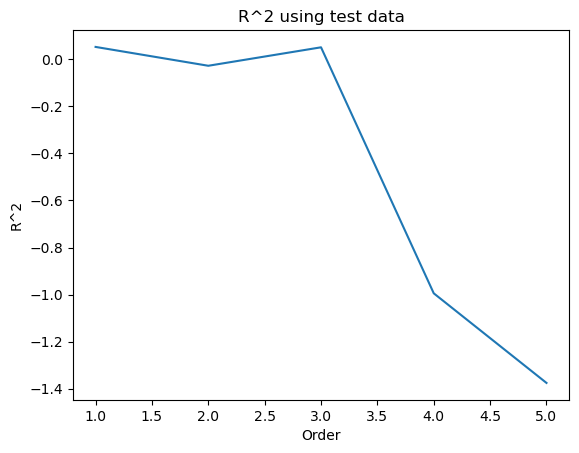

In [115]:
plt.plot(order,Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.show()

In [116]:
#Creating Polynomial model of degree 2 
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [117]:
#Creating Ridge Regression model and evaluating it with different alpha
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████████| 999/999 [00:03<00:00, 307.90it/s, Test Score=0.423, Train Score=0.669]


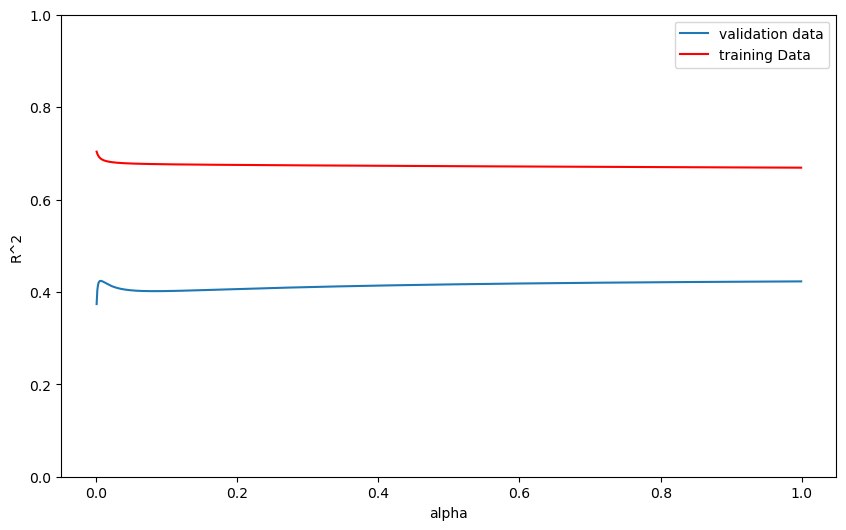

In [118]:
#Plotting R-Squared for training and testing sets with value of alpha
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [119]:
#GridSearchCV to identify the value of alpha for which the model performs best
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [120]:
#Create a Ridge instance and run Grid Search
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [121]:
#Fit the Grid Search to the training data
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [122]:
#R-Square value of test data using estimator
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.300990504869182
